# Simple Heuristics for the Traveling Salesman Problem in Python
As described [here](https://allaboutalgorithms.com/simple-heuristics-for-the-traveling-salesman-problem-in-python-995d491c5521).

(-0.022972159056386242,
 0.9496067861578744,
 -0.043928214335027485,
 0.9592446797784799)

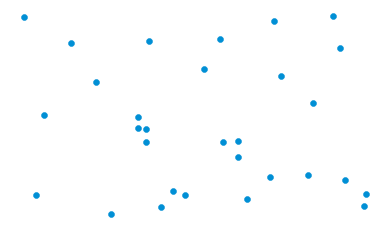

In [1]:
import random
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
random.seed(123)

cities = [(random.random(), random.random()) for _ in range(30)]

plt.scatter(
    [city[0] for city in cities],
    [city[1] for city in cities],
)
plt.axis("off")

In [2]:
import math

distance_matrix = [
    [math.sqrt((start_city[0] - end_city[0]) ** 2 + (start_city[1] - end_city[1]) ** 2) for end_city in cities]
    for start_city in cities
]

In [3]:
def nearest_city_verbose(distance_matrix, start):
    tour = [start]
    total_length = 0
    unvisited_cities = set(range(len(distance_matrix))) - {start}

    while unvisited_cities:
        min_distance = float("inf")  # gets overwritten immediately
        closest_city = -1  # gets overwritten immediately
        for city in unvisited_cities:
            distance = distance_matrix[tour[-1]][city]  # distance between last inserted city and new city
            if distance < min_distance:
                min_distance = distance
                closest_city = city

        tour.append(closest_city)
        total_length += min_distance
        unvisited_cities.remove(closest_city)

    return {
        "tour": tour + [start],  # return to start
        "length": total_length + distance_matrix[tour[-1]][start],  # and don't forget to add the length as well
    }

In [4]:
def nearest_city(distance_matrix, start):
    tour = [start]
    total_length = 0
    unvisited_cities = set(range(len(distance_matrix))) - {start}

    while unvisited_cities:
        closest_city, min_distance = min(
            ((city, distance_matrix[tour[-1]][city]) for city in unvisited_cities), key=lambda x: x[1]
        )
        tour.append(closest_city)
        total_length += min_distance
        unvisited_cities.remove(closest_city)

    return {"tour": tour + [start], "length": total_length + distance_matrix[tour[-1]][start]}

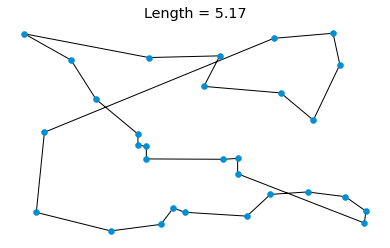

In [5]:
def plot(result, cities):
    plt.scatter(
        [city[0] for city in cities],
        [city[1] for city in cities],
    )

    plt.plot(
        [cities[result["tour"][i]][0] for i in range(len(result["tour"]))],
        [cities[result["tour"][i]][1] for i in range(len(result["tour"]))],
        c="k",
        linewidth=1,
        zorder=-1,
    )

    plt.title(f"Length = {result['length']:.2f}")

    plt.axis("off")


result = nearest_city(distance_matrix, start=0)  # start with city 0
plot(result, cities)

In [6]:
def nearest_city_with_best_start(distance_matrix):  # no "start" argument anymore
    n = len(distance_matrix)  # number of cities
    return min((nearest_city(distance_matrix, start) for start in range(n)), key=lambda x: x["length"])

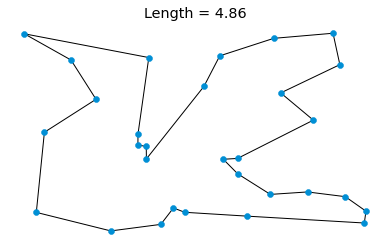

In [7]:
result = nearest_city_with_best_start(distance_matrix)
plot(result, cities)

In [8]:
def greedy_insert(distance_matrix, start):
    unvisited_cities = set(range(len(distance_matrix))) - {start}
    tour = [start, start]
    total_length = 0

    while unvisited_cities:
        total_length, best_i, best_city = min(
            (
                (
                    total_length
                    - distance_matrix[tour[i - 1]][tour[i]]
                    + distance_matrix[tour[i - 1]][city]
                    + distance_matrix[city][tour[i]],
                    i,
                    city,
                )
                for city in unvisited_cities
                for i in range(1, len(tour))
            ),
            key=lambda x: x[0],
        )
        tour = tour[:best_i] + [best_city] + tour[best_i:]
        unvisited_cities.remove(best_city)

    return {"tour": tour, "length": total_length}


# again, we can optimize over the starting city
def greedy_insert_with_best_start(distance_matrix):
    return min((greedy_insert(distance_matrix, start) for start in range(len(distance_matrix))), key=lambda x: x["length"])

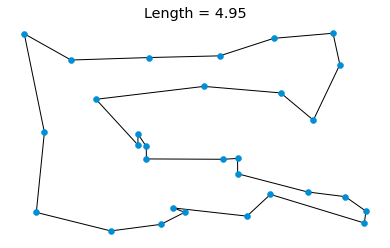

In [9]:
result = greedy_insert_with_best_start(distance_matrix)

plot(result, cities)

In [10]:
def random_walk(distance_matrix):
    n = len(distance_matrix)
    tour = list(range(n))
    random.shuffle(tour)
    tour.append(tour[0])

    return {"tour": tour, "length": sum([distance_matrix[tour[i]][tour[i + 1]] for i in range(n)])}

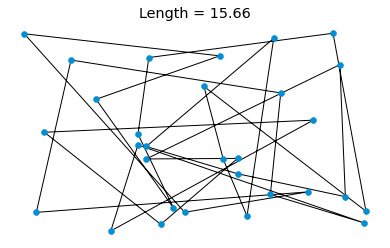

In [11]:
result = random_walk(distance_matrix)

plot(result, cities)